In [10]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [11]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

C:\Users\kesha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [14]:
df = df.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE',
              'EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

In [15]:

def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
-122.351134    212
-122.347294    190
-122.345863    163
-122.332451    160
-122.269988    152
-122.329049    147
-122.310949    146
-122.289923    142
-122.334666    138
-122.339174    136
-122.321920    136
-122.329974    135
-122.335571    133
-122.302329    132
-122.324615    131
-122.269982    130
-122.339439    129
-122.339559    129
-122.316733    128
-122.333757    128
-122.277664    128
-122.323239    126
-122.334792    125
-122.327525    121
-122.287546    121
              ... 
-122.339360      1
-122.350751      1
-122.290428      1
-122.360492      1
-122.346878      1
-122.373860      1
-122.394434      1
-122.291681      1
-122.301697      1
-122.354259      1
-122.386178      1
-122.390046      1
-122.36

In [16]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unlnown", np.nan, inplace = True)
df.replace("other", np.nan, inplace = True)

df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"],axis=0,inplace=True)

print(df.info())
missing_function(df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE      180067 non-null int64
X                 180067 non-null float64
Y                 180067 non-null float64
ADDRTYPE          180067 non-null object
SEVERITYCODE.1    180067 non-null int64
COLLISIONTYPE     180067 non-null object
PERSONCOUNT       180067 non-null int64
PEDCOUNT          180067 non-null int64
PEDCYLCOUNT       180067 non-null int64
VEHCOUNT          180067 non-null int64
JUNCTIONTYPE      180067 non-null object
UNDERINFL         180067 non-null object
WEATHER           180067 non-null object
ROADCOND          180067 non-null object
LIGHTCOND         180067 non-null object
HITPARKEDCAR      180067 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 23.4+ MB
None
SEVERITYCODE
False    180067
Name: SEVERITYCODE, dtype: int64
1    124258
2     55809
Name: SEVERITYCODE, dtype: int64

X
False    180067
Name: X, dtype: int64
-122.3326

In [17]:
df['SEVERITYCODE'].value_counts()

1    124258
2     55809
Name: SEVERITYCODE, dtype: int64

In [18]:
#shuffling and creating a balanced dataset
df= df.sample(frac=1,random_state=0,replace=False)

# 1 - Put all severity code 2 class in a separate dataset.
df_scode2 = df.loc[df['SEVERITYCODE'] == 2]

# 2 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

# 3 - concatenating datasets to get balanced dataset
df_balanced = pd.concat([df_scode1,df_scode2])
df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
print(df_balanced.info())
print(df_balanced['SEVERITYCODE'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104735 entries, 101571 to 137943
Data columns (total 16 columns):
SEVERITYCODE      104735 non-null int64
X                 104735 non-null float64
Y                 104735 non-null float64
ADDRTYPE          104735 non-null object
SEVERITYCODE.1    104735 non-null int64
COLLISIONTYPE     104735 non-null object
PERSONCOUNT       104735 non-null int64
PEDCOUNT          104735 non-null int64
PEDCYLCOUNT       104735 non-null int64
VEHCOUNT          104735 non-null int64
JUNCTIONTYPE      104735 non-null object
UNDERINFL         104735 non-null object
WEATHER           104735 non-null object
ROADCOND          104735 non-null object
LIGHTCOND         104735 non-null object
HITPARKEDCAR      104735 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 13.6+ MB
None
2    55809
1    48926
Name: SEVERITYCODE, dtype: int64


In [19]:
X = df_balanced.iloc[:,1:]

#Encoding Categorical Features - Training Dataset
X = pd.get_dummies(data=X, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

Y = df_balanced[['SEVERITYCODE']]
print(X.info())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104735 entries, 101571 to 137943
Data columns (total 59 columns):
X                                                                 104735 non-null float64
Y                                                                 104735 non-null float64
SEVERITYCODE.1                                                    104735 non-null int64
PERSONCOUNT                                                       104735 non-null int64
PEDCOUNT                                                          104735 non-null int64
PEDCYLCOUNT                                                       104735 non-null int64
VEHCOUNT                                                          104735 non-null int64
ADDRTYPE_Block                                                    104735 non-null uint8
ADDRTYPE_Intersection                                             104735 non-null uint8
COLLISIONTYPE_Angles                                              104735 non-null uint8


In [20]:
#Scaling training data as per the requirements
scaler = StandardScaler()
X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#Scaling test data as per the requirements
scaler = StandardScaler()
X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

X_train.info()

C:\Users\kesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kesha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\kesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83788 entries, 24955 to 35418
Data columns (total 59 columns):
X                                                                 83788 non-null float64
Y                                                                 83788 non-null float64
SEVERITYCODE.1                                                    83788 non-null int64
PERSONCOUNT                                                       83788 non-null float64
PEDCOUNT                                                          83788 non-null float64
PEDCYLCOUNT                                                       83788 non-null float64
VEHCOUNT                                                          83788 non-null float64
ADDRTYPE_Block                                                    83788 non-null uint8
ADDRTYPE_Intersection                                             83788 non-null uint8
COLLISIONTYPE_Angles                                              83788 non-null uint8
COLLI

In [21]:
df_corr = pd.concat([Y_train,X_train])
df_corr = df_corr.corr()


C:\Users\kesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


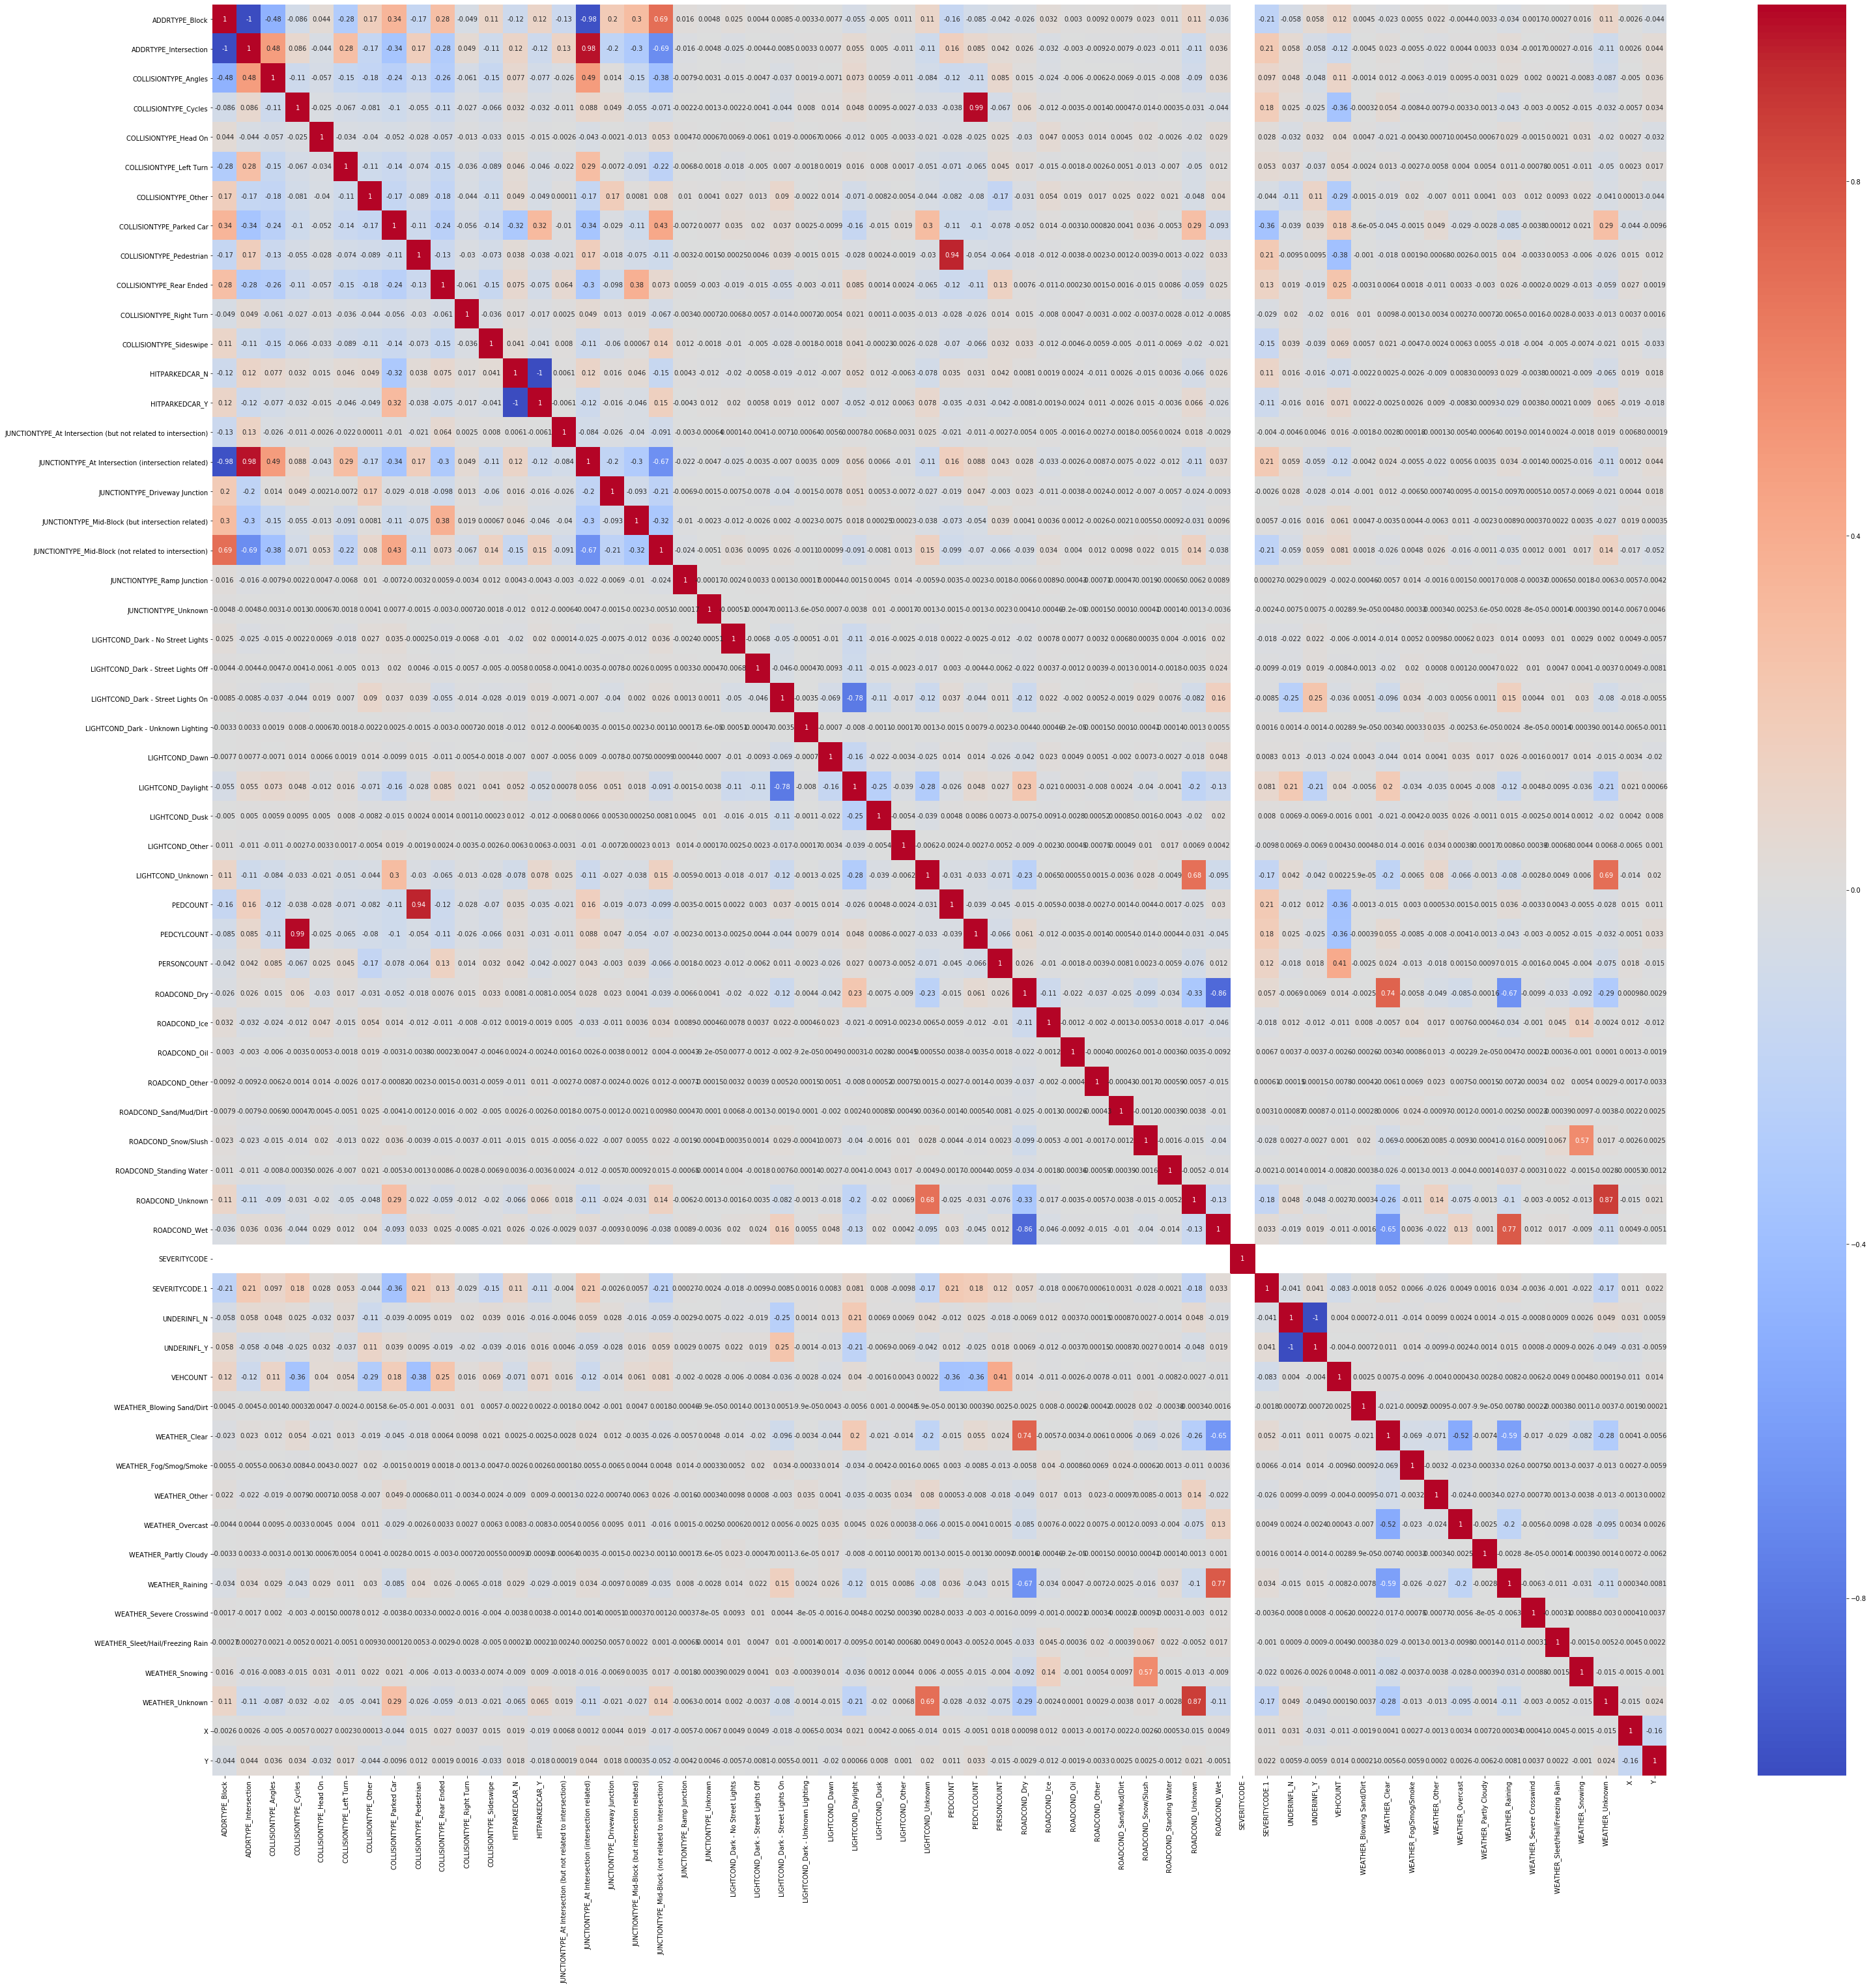

In [22]:
plt.figure(figsize=(50,50))
seaborn.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.savefig('corr.png')

In [23]:
missing_function(X_train)
print(X_train.info())
print(X_test.info())

X
False    83788
Name: X, dtype: int64
-0.485965    143
 0.076183    130
-0.076732    125
 1.042837    119
-0.489331    119
-0.694472     97
-0.069980     87
-0.566128     85
 0.455412     84
 2.017944     82
-0.143996     76
 0.043756     73
 0.012827     70
 0.936898     70
-0.174779     69
 1.761356     69
 0.648750     68
-0.294682     67
-0.113618     67
 0.191952     66
-0.174271     65
 0.048289     65
-0.492289     64
 1.466385     64
-0.174361     63
-0.518288     62
 0.282029     62
 0.317043     62
-0.303557     62
 0.931196     61
            ... 
-1.112839      1
 1.249448      1
-0.352386      1
-0.944401      1
 1.374590      1
 0.698378      1
-1.774113      1
-1.241895      1
-1.212741      1
-1.018851      1
-0.803087      1
-0.123633      1
-1.489096      1
-0.314437      1
-2.134797      1
 1.316321      1
 0.917327      1
 1.971157      1
 1.424258      1
-0.760977      1
-2.091617      1
-2.366057      1
 1.535464      1
 2.056682      1
 1.060653      1
-0.887429

In [24]:
#Fitting and Predictions
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,Y_train)
lr_predictions = lr.predict(X_test)

#Confusion Matrix
lr_cm = confusion_matrix(Y_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(Y_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 9850     0]
 [    0 11097]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9850
           2       1.00      1.00      1.00     11097

    accuracy                           1.00     20947
   macro avg       1.00      1.00      1.00     20947
weighted avg       1.00      1.00      1.00     20947
 

1.0 



In [25]:
#Fitting and Predictions
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,4,5,6,7],
          'p':[1,2]}
knn1 = GridSearchCV(knn, param_grid=params)
knn1.fit(X_train,Y_train.values.ravel())
knn_predictions = knn1.predict(X_test)

print('Best Hyperparameter KNN : ',knn1.best_params_)

#Confusion Matrix
knn_cm = confusion_matrix(Y_test,knn_predictions)
print(knn_cm,'\n')

#Classification Report
knn_cr = classification_report(Y_test,knn_predictions)
print(knn_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,knn_predictions)
print(acc,'\n')
accDict['KNN'] = acc

C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter KNN :  {'n_neighbors': 7, 'p': 1}
[[ 9671   179]
 [  129 10968]] 

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      9850
           2       0.98      0.99      0.99     11097

    accuracy                           0.99     20947
   macro avg       0.99      0.99      0.99     20947
weighted avg       0.99      0.99      0.99     20947
 

0.9852962238029312 



In [26]:
#Fitting and Predictions
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_predictions = nb.predict(X_test)

#Confusion Matrix
nb_cm=confusion_matrix(Y_test,nb_predictions)
print(nb_cm,'\n')

#Classification Report
nb_cr = classification_report(Y_test,nb_predictions)
print(nb_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,nb_predictions)
print(acc,'\n')
accDict['NB'] = acc

C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 9850     0]
 [    0 11097]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9850
           2       1.00      1.00      1.00     11097

    accuracy                           1.00     20947
   macro avg       1.00      1.00      1.00     20947
weighted avg       1.00      1.00      1.00     20947
 

1.0 



In [27]:
#Fitting and Predictions
dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(X_train,Y_train)
dtc_predictions = dtc1.predict(X_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

#Confusion Matrix
dtc_cm=confusion_matrix(Y_test,dtc_predictions)
print(dtc_cm,'\n')

#Classification Report
dtc_cr = classification_report(Y_test,dtc_predictions)
print(dtc_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter DTC :  {'criterion': 'gini', 'random_state': 0}
[[ 9850     0]
 [    0 11097]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9850
           2       1.00      1.00      1.00     11097

    accuracy                           1.00     20947
   macro avg       1.00      1.00      1.00     20947
weighted avg       1.00      1.00      1.00     20947
 

1.0 



In [28]:
#Fitting and Predictions
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(X_train,Y_train)
rf_predictions = rf1.predict(X_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(Y_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(Y_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,rf_predictions)
print(acc,'\n')
accDict['RFT'] = acc

C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Best Hyperparameter RFT :  {'criterion': 'gini', 'n_estimators': 50, 'random_state': 0}
[[ 9850     0]
 [    0 11097]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9850
           2       1.00      1.00      1.00     11097

    accuracy                           1.00     20947
   macro avg       1.00      1.00      1.00     20947
weighted avg       1.00      1.00      1.00     20947
 

1.0 



In [29]:
#Fitting and Predictions
svc = SVC()
params = {'kernel':['linear','rbf'], 
          'random_state':[0]}
svc1 = GridSearchCV(svc, param_grid=params)
svc1.fit(X_train,Y_train)
svc_predictions = svc1.predict(X_test)
print('Best Hyperparameter SVM : ',svc1.best_params_)

#Confusion Matrix
svc_cm=confusion_matrix(Y_test,svc_predictions)
print(svc_cm,'\n')

#Classification Report
svc_cr = classification_report(Y_test,svc_predictions)
print(svc_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,svc_predictions)
print(acc,'\n')
accDict['SVC'] = acc

C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Best Hyperparameter SVM :  {'kernel': 'linear', 'random_state': 0}
[[ 9850     0]
 [    0 11097]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9850
           2       1.00      1.00      1.00     11097

    accuracy                           1.00     20947
   macro avg       1.00      1.00      1.00     20947
weighted avg       1.00      1.00      1.00     20947
 

1.0 



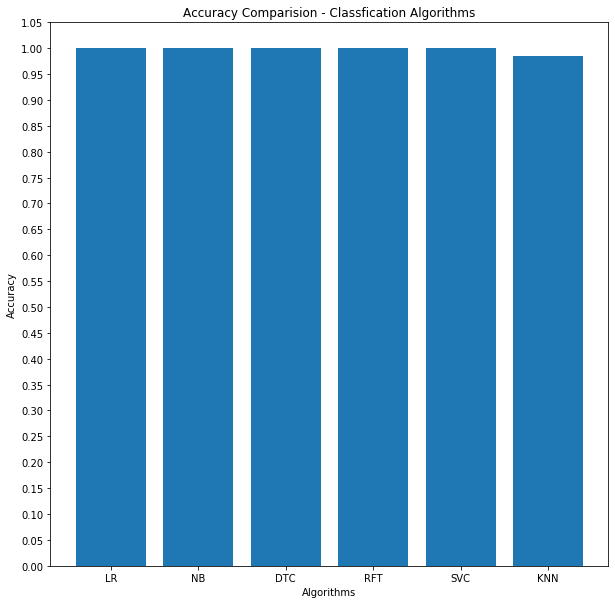

In [30]:
accDict = sorted(accDict.items(), key=lambda x: x[1], reverse=True)
dict1 = {}
for elem in accDict:
    dict1[elem[0]] = elem[1]
Algorithms = dict1.keys()
Accuracy = dict1.values()
plt.figure(figsize=(10,10))
plt.bar(Algorithms, Accuracy)
plt.xlabel('Algorithms')
plt.yticks(np.arange(0,max(Accuracy)+0.1,0.05))
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision - Classfication Algorithms')
plt.show()